# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Samuel Sahat Mardyantoro
- **Email:** muelsahat@gmail.com
- **ID Dicoding:** samuel_sahatt

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim dan cuaca terhadap jumlah pengguna?




- Pada jam berapa aktivitas pengguna paling tinggi dan paling rendah?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Wrangling

### Gathering Data

In [43]:
#Dataframe harian
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [44]:
# Dataframe jam
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Mengimport file csv dataset ke colab. Terdapat dua dataset yang diimport yaitu day.csv dan hour.csv

### Assessing Data

Assessing day_df

In [45]:
#Datatype day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [46]:
#Duplikasi day_df
day_df.duplicated().sum()

0

In [47]:
#Data kosong day_df
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Assessing hour_df

In [50]:
#Datatype hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
hour_df.duplicated().sum()

0

In [49]:
#Data kosong hour_df
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:** Pada tahap ke-2 berhasil melakukan assessing atau penilaian terhadap kedua dataset yang ada. Dan bisa dilihat tidak ada baris yang kosong ataupun duplikat. Namun masih ada ketidaksesuaian tipe pada kolom 'dteday' yang masih bertipe object dan perlu diubah

### Cleaning Data

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [17]:
# Mengubah data type
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [18]:
day_df.info(), hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

(None, None)

In [19]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:** Pada tahap cleaning berhasil mengubah jenis tipe data kolom 'dteday' menjadi tipe datetime untuk kedua dataframe

## Exploratory Data Analysis (EDA)

### Exploring day_df

In [21]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
544,545,2012-06-28,3,1,6,0,4,1,1,0.749167,0.675512,0.422500,0.171650,921,5958,6879
13,14,2011-01-14,1,0,1,0,5,1,1,0.160870,0.188413,0.537826,0.126548,54,1367,1421
189,190,2011-07-09,3,0,7,0,6,0,1,0.733333,0.664158,0.609167,0.167912,1988,3348,5336
91,92,2011-04-02,2,0,4,0,6,0,2,0.315000,0.315637,0.653750,0.197146,898,1354,2252
559,560,2012-07-13,3,1,7,0,5,1,2,0.731667,0.667933,0.485833,0.080850,1511,5988,7499


In [22]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Weather Categories
1. Clear, Few clouds, Partly cloudy, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Season Categories
1. Spring
2. Summer
3. Fall
4. Winter


In [51]:
# Grouping berdasarkan temperature, kecepatan angin, dan humidity
day_df.groupby(by ='weathersit').agg({
    'temp': 'mean',
    'windspeed': 'mean',
    'hum': 'mean',
})

,temp,windspeed,hum
weathersit,,,
1,0.511541,0.190253,0.565594
2,0.470366,0.186431,0.725887
3,0.433440,0.243336,0.848872


In [52]:
# Grouping jumlah pengguna berdasarkan musim dan cuaca
day_df.groupby(by = ['season','weathersit']).agg({
    'cnt': 'sum'
})

cnt
season weathersit        
1      1           312036
       2           155573
       3             3739
2      1           626986
       2           288096
       3             3507
3      1           799443
       2           250679
       3            11007
4      1           519487
       2           302510
       3            19616

In [53]:
# Grouping jumlah pengguna berdasarkan musim
day_df.groupby(by ='season').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
})

,casual,registered,cnt
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


In [54]:
# Grouping jumlah pengguna berdasarkan cuaca
day_df.groupby(by ='weathersit').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
})

,casual,registered,cnt
weathersit,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


### Exploring hour_df

In [27]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6614,6615,2011-10-08,4,0,10,4,0,6,0,1,0.42,0.4242,0.94,0.1343,3,7,10
15338,15339,2012-10-06,4,1,10,7,0,6,0,1,0.54,0.5152,0.83,0.2985,13,71,84
4016,4017,2011-06-21,3,0,6,6,0,2,1,2,0.60,0.5455,0.88,0.1343,8,107,115
8949,8950,2012-01-13,1,1,1,18,0,5,1,1,0.26,0.2273,0.38,0.2985,7,294,301
11758,11759,2012-05-10,2,1,5,3,0,4,1,1,0.46,0.4545,0.88,0.2239,0,3,3


In [55]:
# Grouping total pengguna berdasarkan jam
per_hour = hour_df.groupby('hr').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
}).sort_values(by=['cnt'], ascending=False)
per_hour.head(5)

,casual,registered,cnt
hr,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789


In [56]:
# 5 terbawah
per_hour.tail(5)

,casual,registered,cnt
hr,,,
1,4709,19455,24164
2,3412,12940,16352
5,1012,13249,14261
3,1893,6281,8174
4,874,3554,4428


**Insight:**
- Pada tahap EDA ini, berhasil mendapatkan informasi dan hasil analisa dari hubungan antara cuaca dan musim terhadap jumlah pengguna aplikasi sepeda. Selain itu juga dilakukan analisis terhadap aktivitas pengguna berdasarkan per jam nya. Pembahasan analisis lebih lanjut akan dimuat di tahap selanjutnya

## Visualization & Explanatory Analysis

Bagaimana pengaruh musim dan cuaca terhadap jumlah pengguna?


In [30]:
day_df.groupby(by ='weathersit').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
})

,casual,registered,cnt
weathersit,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


In [31]:
day_df.groupby(by ='season').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
})

,casual,registered,cnt
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


In [32]:
day_df.groupby(by = ['season','weathersit']).agg({
    'cnt': 'sum'
})

cnt
season weathersit        
1      1           312036
       2           155573
       3             3739
2      1           626986
       2           288096
       3             3507
3      1           799443
       2           250679
       3            11007
4      1           519487
       2           302510
       3            19616

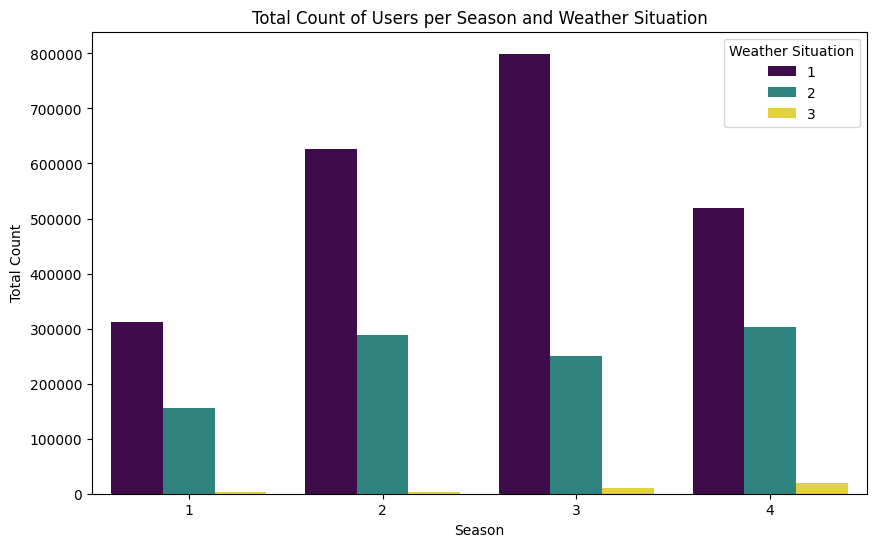

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

grouped_df = day_df.groupby(by=['season', 'weathersit']).agg({'cnt': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='season', y='cnt', hue='weathersit', palette='viridis')

plt.xlabel('Season')
plt.ylabel('Total Count')
plt.title('Total Count of Users per Season and Weather Situation')
plt.legend(title='Weather Situation')

plt.show()

#season (1:springer, 2:summer, 3:fall, 4:winter)
#weathersit :
#		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


<ipython-input-34-0b0f8bb29da1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_df, x='season', y='cnt', palette='Blues')


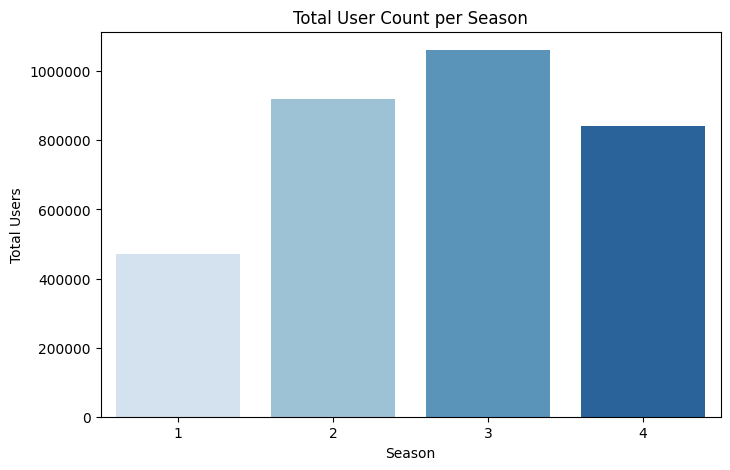

In [34]:

grouped_df = day_df.groupby(by='season').agg({'cnt': 'sum'}).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped_df, x='season', y='cnt', palette='Blues')

plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Season')
plt.ylabel('Total Users')
plt.title('Total User Count per Season')

plt.show()
#season (1:springer, 2:summer, 3:fall, 4:winter)

<ipython-input-35-db27b39e0501>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_df, x='weathersit', y='cnt', palette='coolwarm')


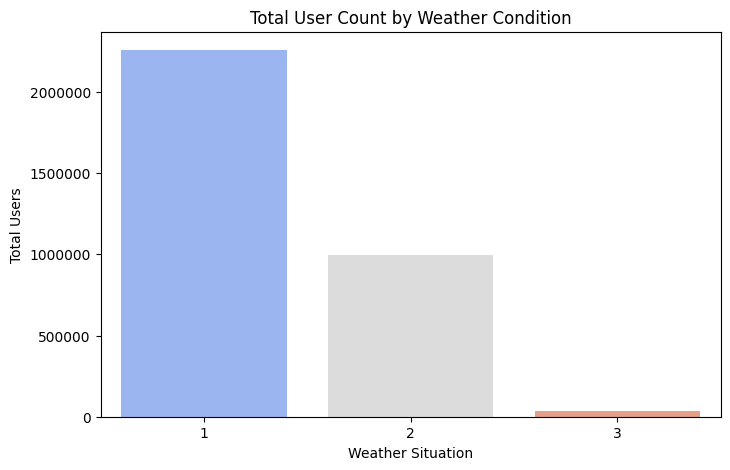

In [35]:
grouped_df = day_df.groupby(by='weathersit').agg({'cnt': 'sum'}).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped_df, x='weathersit', y='cnt', palette='coolwarm')

plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Weather Situation')
plt.ylabel('Total Users')
plt.title('Total User Count by Weather Condition')

plt.show()

#weathersit :
#		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

Pada jam berapa aktivitas pengguna paling tinggi dan paling rendah?

In [36]:
per_hour.head(10)

,casual,registered,cnt
hr,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


In [37]:
per_hour.tail(5)

,casual,registered,cnt
hr,,,
1,4709,19455,24164
2,3412,12940,16352
5,1012,13249,14261
3,1893,6281,8174
4,874,3554,4428


<ipython-input-38-69e9147ee7d4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x='hr', y='cnt', palette='Blues')


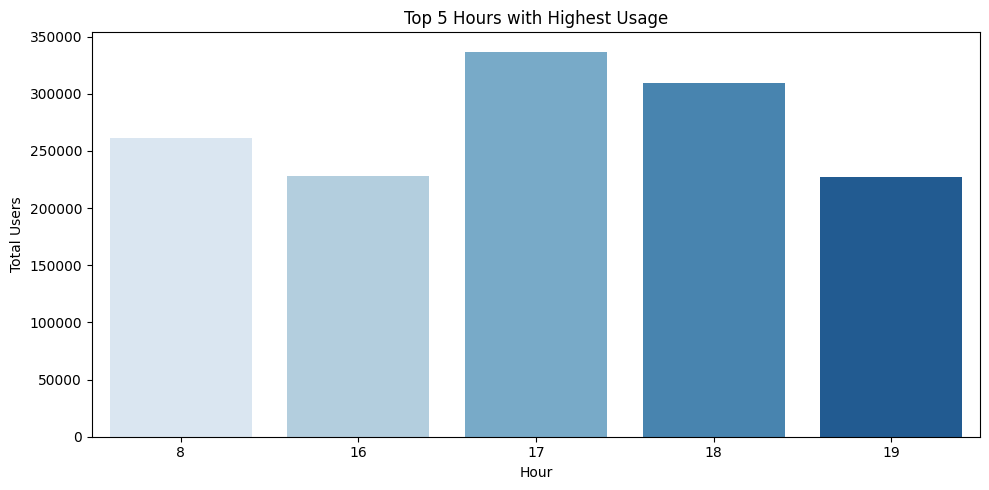

In [38]:
top_5 = per_hour.head(5).reset_index()

plt.figure(figsize=(10, 5))

sns.barplot(data=top_5, x='hr', y='cnt', palette='Blues')
plt.title('Top 5 Hours with Highest Usage')
plt.xlabel('Hour')
plt.ylabel('Total Users')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

<ipython-input-39-aa8b4ff82630>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_5, x='hr', y='cnt', palette='Reds')


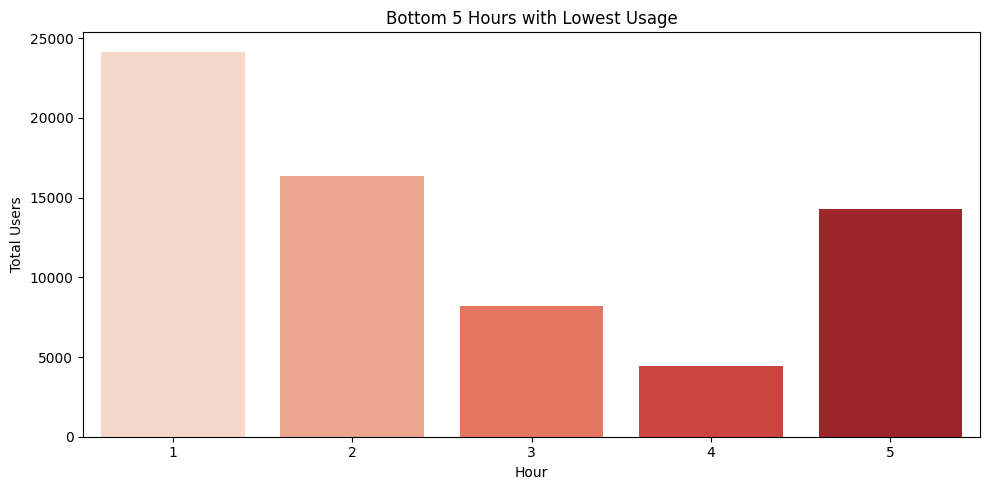

In [39]:
bottom_5 = per_hour.tail(5).reset_index()

plt.figure(figsize=(10, 5))


sns.barplot(data=bottom_5, x='hr', y='cnt', palette='Reds')
plt.title('Bottom 5 Hours with Lowest Usage')
plt.xlabel('Hour')
plt.ylabel('Total Users')
plt.ticklabel_format(style='plain', axis='y')

# Tampilkan grafik
plt.tight_layout()
plt.show()

**Insight:**
- Pada tahap visualization, kita berhasil memvisualisasikan hasil hasil analisis kita tadi yang telah kita lakukan pada tahap EDA. Pembuatan visualisasi sudah sesuai dengan ketentuan agar baik dan efektif dengan menerapkan prinsip desain dan integritas

## Analisis Lanjutan (Opsional)

## Conclusion

In [40]:
day_df.groupby(by ='weathersit').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
})
#season (1:springer, 2:summer, 3:fall, 4:winter)

,casual,registered,cnt
weathersit,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


In [41]:
day_df.groupby(by ='weathersit').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
})


,casual,registered,cnt
weathersit,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


- Conclusion pertanyaan 1

Penggunaan sepeda terbanyak terjadi pada musim gugur, diikuti oleh musim panas dan salju, sementara musim semi memiliki jumlah pengguna terendah. Kondisi cuaca juga berpengaruh signifikan terhadap jumlah pengguna, di mana cuaca cerah (kategori 1) memiliki jumlah pengguna tertinggi hampir mencapai 2 juta pengguna. Diikuti oleh cuaca mendung atau sedikit hujan (kategori 2) yang hampir menyentuh 1 juta dengan 996 ribu pengguna. Sedangkan kondisi cuaca buruk (kategori 3) memiliki jumlah pengguna yang sangat rendah yaitu hanya 37 ribu total pengguna.

Jika dilihat dari perbandingan musim, tidak ada perbedaan yang terlalu berarti untuk jumlah penggunanya. Musim gugur memiliki jumlah pengguna terbanyak yang mencapai angka 1 juta pengguna. Diikuti posisi kedua oleh musim panas sebanyak 900 ribu pengguna. Peringkat ketiga dimiliki oleh musim salju dengan perolehan jumlah pengguna sebanyak 840 ribu pengguna. Dan posisi terakhir musim semi yang hanya memiliki 470 ribu total pengguna.

Distribusi pengguna berdasarkan kombinasi musim dan cuaca menunjukkan bahwa pada setiap musim, cuaca cerah selalu mendominasi dalam menarik lebih banyak pengguna. Hal ini menunjukkan bahwa faktor cuaca dan musim secara langsung mempengaruhi tingkat penggunaan sepeda, dengan preferensi pengguna yang lebih tinggi saat cuaca lebih baik dan di musim yang lebih kondusif untuk aktivitas luar ruangan.

- Conclusion pertanyaan 2

Dari analisis grafik, terlihat bahwa penggunaan layanan mencapai puncaknya pada pukul 8, 16, 17, 18, dan 19, yang kemungkinan besar terkait dengan jam kerja dan aktivitas commuting, terutama pukul 17-18 menjadi waktu tersibuk yang masing-masing mencapai 300 ribu jumlah pengguna dengan pukul 17 30 ribu pengguna lebih banyak dari pukul 18. Sebaliknya, penggunaan paling rendah terjadi pada pukul 1-5 pagi. Dengan pukul 3 dan 4 yang bahkan tidak menyentuh angka 10 ribu. Pukul 4 hanya memiliki 4400 penguna dan pukul 3 dengan 8174 total pengguna.

In [42]:
per_hour.head(5), per_hour.tail(5)

(    casual  registered     cnt
 hr                            
 17   54220      282640  336860
 18   44496      265276  309772
 8    15761      245240  261001
 16   53834      173914  227748
 19   35505      191284  226789,
     casual  registered    cnt
 hr                           
 1     4709       19455  24164
 2     3412       12940  16352
 5     1012       13249  14261
 3     1893        6281   8174
 4      874        3554   4428)